In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("dataset/dataset_tcc_final.csv")
data.head()

,estacao,dataNotif,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,saidaSuspeitaObitos,saidaSuspeitaAltas,saidaConfirmadaObitos,saidaConfirmadaAltas,lat,long,no_fantasia,tp_gestao,no_bairro
0,VERAO,04/01/2020,113.0,70.0,34.0,25.0,0,1,0,3,-23.57005,-46.64571,HOSPITAL SANTA CATARINA,M,BELA VISTA
1,VERAO,07/02/2020,13.0,0.0,0.0,0.0,0,0,0,0,-23.53166,-46.62066,HOSP NSRA DO PARI,M,CANINDE
2,VERAO,20/03/2020,5.0,0.0,0.0,0.0,0,0,0,0,-23.56392,-46.59042,CEMA HOSP ESPEC,M,MOOCA
3,OUTONO,01/04/2020,91.0,44.0,0.0,3.0,0,0,0,0,-23.54198,-46.63503,HOSP MUN GILSON DE CASSIA MARQUES DE CARVALHO,M,VILA MASCOTE
4,OUTONO,01/04/2020,56.0,27.0,29.0,10.0,0,0,3,10,-23.69182,-46.77556,HOSP MUN M BOI MIRIM,M,JARDIM ANGELA


In [3]:
data['totalObitos'] = data['saidaConfirmadaObitos'] + data['saidaSuspeitaObitos']

In [4]:
df_pre = data[['no_fantasia','totalObitos']]
df_pre.shape

(39894, 2)

In [5]:
df_group = df_pre.groupby(['no_fantasia']).sum().reset_index()
#df_group.shape
df_group.head()

,no_fantasia,totalObitos
0,A C CAMARGO CANCER CENTER,112
1,AIS UNINOVE VERGUEIRO,121
2,ASSOC AACD V CLEMENTINO,2
3,CAISM DR DAVID CAPISTRANO DA COSTA FILHO DA AG...,0
4,CAISM PHILIPPE PINEL SAO PAULO,0


In [6]:
df_group.sort_values(by=["totalObitos"], inplace=True, ascending=False)
df_ordered = df_group.head(10)
df_ordered

,no_fantasia,totalObitos
65,HOSPITAL ESTADUAL DE SAPOPEMBA SAO PAULO,16546
81,HOSPITAL LOCAL DE SAPOPEMBA,3758
32,HOSP MUN JOSANIAS CASTANHA BRAGA,1650
13,HC DA FMUSP HOSPITAL DAS CLINICAS SAO PAULO,1558
70,HOSPITAL GERAL DE VILA PENTEADO DR JOSE PANGEL...,1466
89,HOSPITAL MUNICIPAL DE CAMPANHA VILA BRASILÂNDIA,1344
119,SANTA CASA DE SAO PAULO HOSPITAL CENTRAL SAO P...,1252
33,HOSP MUN M BOI MIRIM,1127
38,HOSP MUN TIDE SETUBAL,1092
43,HOSP STA MARCELINA SAO PAULO,930


In [7]:
hospitais = df_ordered[::-1]["no_fantasia"]
hospitais

43                          HOSP STA MARCELINA SAO PAULO
38                                 HOSP MUN TIDE SETUBAL
33                                  HOSP MUN M BOI MIRIM
119    SANTA CASA DE SAO PAULO HOSPITAL CENTRAL SAO P...
89       HOSPITAL MUNICIPAL DE CAMPANHA VILA BRASILÂNDIA
70     HOSPITAL GERAL DE VILA PENTEADO DR JOSE PANGEL...
13           HC DA FMUSP HOSPITAL DAS CLINICAS SAO PAULO
32                      HOSP MUN JOSANIAS CASTANHA BRAGA
81                           HOSPITAL LOCAL DE SAPOPEMBA
65              HOSPITAL ESTADUAL DE SAPOPEMBA SAO PAULO
Name: no_fantasia, dtype: object

In [8]:
nObitos = df_ordered[::-1]["totalObitos"]
nObitos

43       930
38      1092
33      1127
119     1252
89      1344
70      1466
13      1558
32      1650
81      3758
65     16546
Name: totalObitos, dtype: int64

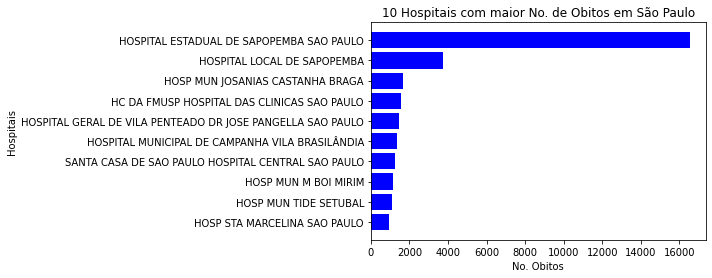

In [9]:
plt.barh(hospitais, nObitos, color = 'blue')
plt.ylabel("Hospitais")
plt.xlabel("No. Obitos")
plt.title("10 Hospitais com maior No. de Obitos em São Paulo")
plt.show()